In [2]:
#Import all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

**Bank Marketing Dataset**

In [3]:
with open('/content/drive/MyDrive/414/bank-names.txt','r') as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

**Load the data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/414/bank-full.csv", delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Transfroming y variable to binary

In [8]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Dealing with missing data

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

dealing with duplicates

In [11]:
# Check for duplicate rows in the DataFrame
duplicates = df.duplicated()

# Display the duplicate rows (if any)
duplicates_data = df[duplicates]

len(duplicates_data)

0

<ipython-input-12-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

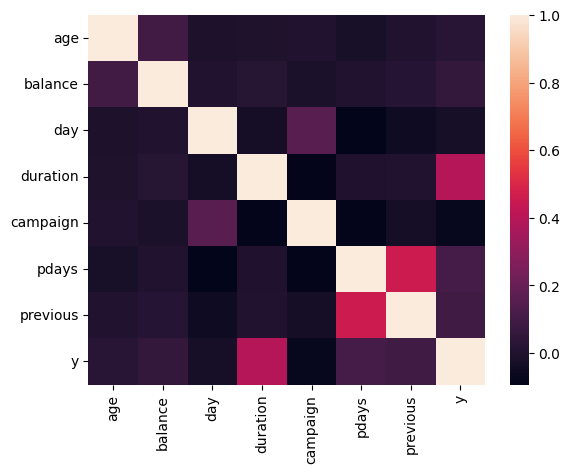

In [12]:
sns.heatmap(df.corr())

In [13]:
df.corr()['y'].sort_values()

<ipython-input-13-1fe75bb73d0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['y'].sort_values()


campaign   -0.073172
day        -0.028348
age         0.025155
balance     0.052838
previous    0.093236
pdays       0.103621
duration    0.394521
y           1.000000
Name: y, dtype: float64

<Axes: xlabel='duration', ylabel='y'>

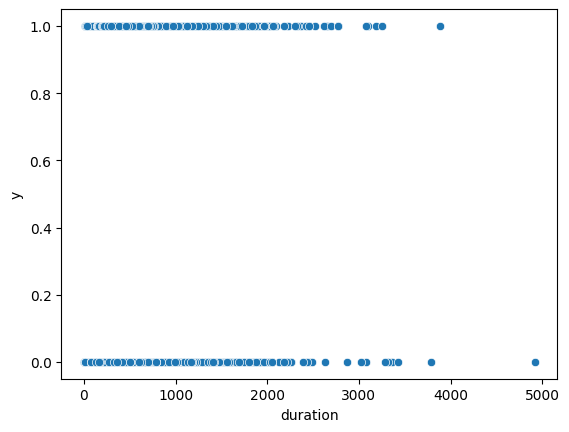

In [14]:
sns.scatterplot(x='duration',y='y',data=df)

<Axes: xlabel='pdays', ylabel='y'>

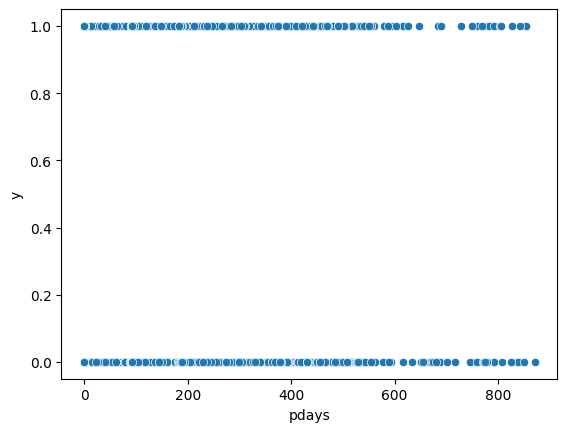

In [15]:
sns.scatterplot(x='pdays',y='y',data=df)

<ipython-input-16-30626c77febe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

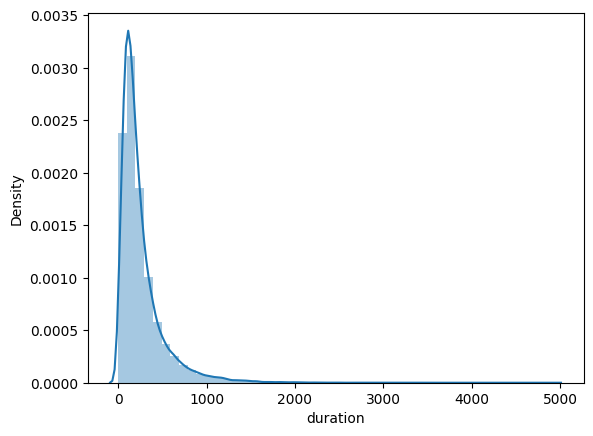

In [16]:
sns.distplot(df['duration'])

In [17]:
df[df['duration']>3500]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,1
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,0


In [18]:
row_drop = df[df['duration']>3500].index
df = df.drop(row_drop, axis=0)

<Axes: xlabel='duration', ylabel='y'>

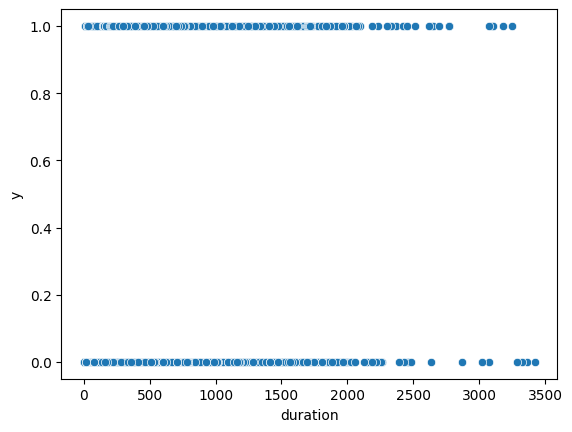

In [19]:
sns.scatterplot(x='duration',y='y',data=df)

Categorical data encoding

In [20]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [21]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45208 non-null  int64
 1   balance   45208 non-null  int64
 2   day       45208 non-null  int64
 3   duration  45208 non-null  int64
 4   campaign  45208 non-null  int64
 5   pdays     45208 non-null  int64
 6   previous  45208 non-null  int64
 7   y         45208 non-null  int64
dtypes: int64(8)
memory usage: 3.1 MB


In [22]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45208 non-null  object
 1   marital    45208 non-null  object
 2   education  45208 non-null  object
 3   default    45208 non-null  object
 4   housing    45208 non-null  object
 5   loan       45208 non-null  object
 6   contact    45208 non-null  object
 7   month      45208 non-null  object
 8   poutcome   45208 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [23]:
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df = pd.concat([df_nums,df_objs],axis=1)

In [24]:
final_df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


**Normality test**

The normality test (in this case, the Shapiro-Wilk test) checks whether the data follows a normal distribution. However, in practice, it's common for real-world datasets to contain features that do not strictly adhere to a perfectly normal distribution.

In [25]:
from scipy.stats import shapiro

In [26]:
# Perform the Shapiro-Wilk test for normality on each feature
normality_results = {}
for column in final_df.columns:
    statistic, p_value = shapiro(final_df[column])
    normality_results[column] = {'statistic': statistic, 'p_value': p_value, 'is_normal': p_value > 0.05}

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
# Display the normality test results
df_normality_results = pd.DataFrame(normality_results).T

In [28]:
df_normality_results.head()

,statistic,p_value,is_normal
age,0.960553,0.0,False
balance,0.457131,0.0,False
day,0.959459,0.0,False
duration,0.733434,0.0,False
campaign,0.550751,0.0,False


Balancing the dataset

In [29]:
target_counts = final_df['y'].value_counts()

([<matplotlib.axis.XTick at 0x7ffad2d3be20>,
 [Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')])

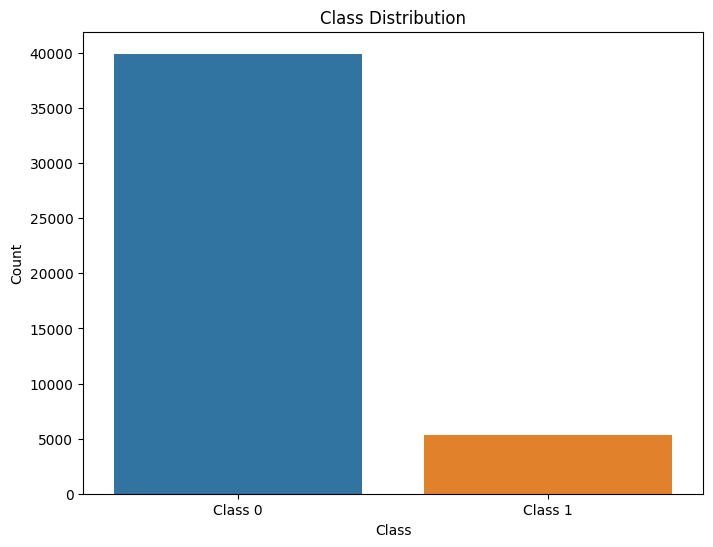

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

In [31]:
# Assuming 'target_variable_column' is the name of your target variable column
X = final_df.drop('y', axis=1)
y = final_df['y']

In [32]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

In [33]:
# Apply SMOTE to create synthetic samples for the minority class
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced data
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['y'] = y_balanced

In [34]:
balanced_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


([<matplotlib.axis.XTick at 0x7ffad2c44a60>,
 [Text(0, 0, 'Class 0'), Text(1, 0, 'Class 1')])

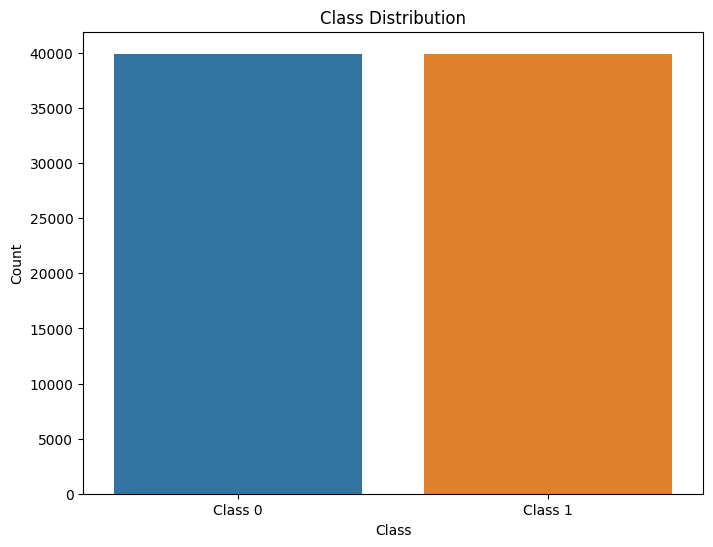

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=balanced_df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['Class 0', 'Class 1'])

**Model Building**




In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [37]:
X = balanced_df.drop('y', axis=1)
y = balanced_df['y']

In [38]:
# Split data into training and validation sets using a percentage split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# Step 3: Scale the features in the training and testing sets using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Learner Selection

In [41]:
# Initialize the models
logistic_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()

Model Training

In [42]:
# Step 4: Train and validate the models using k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
# Perform cross-validation and get the evaluation metrics for both models
logistic_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')
decision_tree_scores = cross_val_score(decision_tree_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

In [44]:
# Step 5: Evaluate the performance of the models using appropriate evaluation measures
def print_evaluation_scores(scores, model_name, learner_predictions):
    print(f"{model_name} Evaluation:")
    print("Accuracy:", scores.mean())
    print("Precision:", precision_score(y_train, learner_predictions))
    print("Recall:", recall_score(y_train, learner_predictions))
    print("F1 Score:", f1_score(y_train, learner_predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, learner_predictions))
    print("------------------------")

    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_train, learner_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [45]:
logistic_predictions = logistic_model.fit(X_train_scaled, y_train).predict(X_train_scaled)
decision_tree_predictions = decision_tree_model.fit(X_train_scaled, y_train).predict(X_train_scaled)

Logistic Regression Evaluation:
Accuracy: 0.928575937485542
Precision: 0.9397412436996372
Recall: 0.9167554024428437
F1 Score: 0.9281060257772
Confusion Matrix:
[[30065  1877]
 [ 2658 29272]]
------------------------


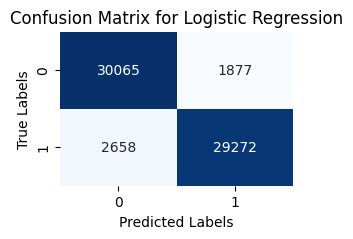

In [46]:
print_evaluation_scores(logistic_scores, "Logistic Regression", logistic_predictions)

Decision Tree Evaluation:
Accuracy: 0.9146575189268074
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[31942     0]
 [    0 31930]]
------------------------


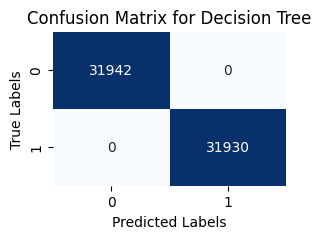

In [47]:
print_evaluation_scores(decision_tree_scores, "Decision Tree", decision_tree_predictions)

In [68]:
# Step 6: Select the best model based on the evaluation results
best_model = logistic_model if precision_score(y_train, logistic_predictions) > precision_score(y_train, decision_tree_predictions) else decision_tree_model
print("Best Model:", best_model)


Best Model: DecisionTreeClassifier()


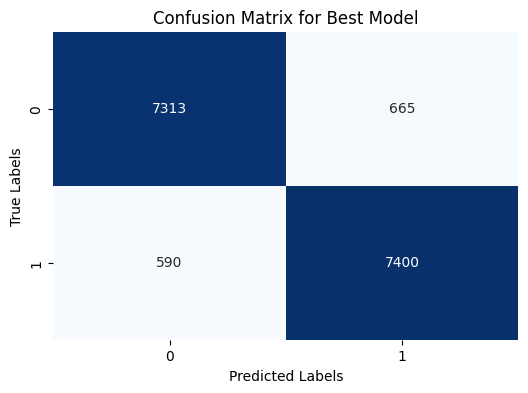

In [69]:
# Step 7: Visualize the results using necessary plots
# Confusion Matrix for the best model (Logistic Regression or Decision Tree)
best_model_predictions = best_model.fit(X_train_scaled, y_train).predict(X_test_scaled)
cm = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Model')
plt.show()

In [71]:
# Calculating evaluation metrics
accuracy = accuracy_score(y_test, best_model_predictions)
precision = precision_score(y_test, best_model_predictions)
recall = recall_score(y_test, best_model_predictions)
f1 = f1_score(y_test, best_model_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(cm)

Accuracy: 0.9214053106212425
Precision: 0.9175449473031618
Recall: 0.9261576971214017
F1 Score: 0.921831205232015
[[7313  665]
 [ 590 7400]]


Spam Base Dataset


In [52]:
with open('/content/drive/MyDrive/414/spambase.txt','r') as f:
    print(f.read())

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [53]:
df = pd.read_csv('/content/drive/MyDrive/414/spambase.data', header=None)

In [54]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [55]:
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
    'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive',
    'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
    'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data',
    'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
    'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'spam',
]


In [56]:
len(column_names)

58

In [57]:
df.columns = column_names

In [58]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [59]:
df['spam'].unique()

array([1, 0])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [61]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [62]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [63]:
# Check for duplicate rows in the DataFrame
duplicates = df.duplicated()

# Display the duplicate rows (if any)
duplicates_data = df[duplicates]

len(duplicates_data)

391

In [64]:
df.drop_duplicates(keep='first', inplace=True)

In [65]:
# Reset the DataFrame index after dropping duplicates
df.reset_index(drop=True, inplace=True)

In [66]:
# Verify that duplicates are removed
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 4210
